In [1]:
import pandas, numpy

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20})

# 0. user-defined variables

In [2]:
data_file ='/home/adrian/projects/HUVECs/data/csv/HUVEC_AllMeasurements_Summary_21.12.2020.Intracellular.csv'

# 1. read data

In [3]:
df = pandas.read_csv(data_file)
df.astype('float', errors='ignore')
df.head()

,Sample ID,Experiment,Treatment,Timepoint (h),Cell numbers,Palmitate,Stearic acid,UDP_Glucose,ATP,UDP_glucuronate,AMP,cAMP,UDP_N_acetylglucosamine,Glutamate,Malate,Succinate,Glutamine,Citrate,Glutathion Ox,Glutathione Red
0,1,2,0.0,0,480000,0.498134,0.355130,0.555664,1.173089,1.471127,0.378996,1.439743,0.948270,0.672770,0.935037,1.085146,0.950878,1.019898,1.358301,0.340923
1,2,2,0.0,0,480000,0.649966,0.504734,5.899347,1.642630,3.903292,0.289142,1.956214,0.514516,0.563908,1.423291,1.002194,0.685802,0.790827,0.804011,0.259466
2,3,2,0.0,0,480000,1.037842,0.811131,4.862396,4.494113,2.117562,0.172695,0.184441,0.314264,0.389639,0.940041,0.833751,0.527135,0.510089,0.913530,0.162939
3,4,2,0.0,4,560000,0.899369,1.097788,0.507172,0.605210,0.965708,1.235501,1.984364,2.796323,2.053525,2.922242,1.885886,1.702201,1.803593,1.404071,2.868344
4,5,2,0.0,4,560000,0.924384,0.881210,0.677431,0.683501,0.771615,0.747560,1.616192,1.380128,1.282800,2.280236,1.018277,1.199941,1.047429,0.818987,1.483302


# 2. format data

## 2.1. select appropriate rows

In [4]:
df = df[df['Cell numbers'].str.isnumeric()]
df['Cell numbers'] = df['Cell numbers'].astype(float)

In [5]:
pandas.set_option("display.max_rows", 200, "display.max_columns", 20)
print(df)

     Sample ID   Experiment  Treatment  Timepoint (h)  Cell numbers  \
0             1           2        0.0              0      480000.0   
1             2           2        0.0              0      480000.0   
2             3           2        0.0              0      480000.0   
3             4           2        0.0              4      560000.0   
4             5           2        0.0              4      560000.0   
5             6           2        0.0              4      560000.0   
6             7           2        0.5              4      510000.0   
7             8           2        0.5              4      510000.0   
8             9           2        0.5              4      510000.0   
9            10           2        5.0              4      380000.0   
10           11           2        5.0              4      380000.0   
11           12           2        5.0              4      380000.0   
12           13           2       50.0              4      205000.0   
13    

# 3. plot

## 3.1. normalized by cell numbers

In [6]:
metabolites = df.columns[5:]
experiments = [2, 3, 5, 6, 7]
times = [4, 24]
treatments = [0.5, 5, 50]

In [7]:
import seaborn

[[0.4789402128165459, 0.15686586536130512, -0.5894866734818577, -0.44833477164728186, -2.852975391389421], [-0.0636237423033913, -0.259016005550415, -0.1257197443029243, 2.2801225431806458, -2.5501510326841337], [0.3188573881798979, -0.054165534181998466, -0.5608504556945515, 1.912336222490859, -2.7604730341853783], [-0.6442078515059352, 0.08749519676321361, -1.3218676595140615, -0.2376994658883527, -0.1870748409775144], [-0.6825373864624948, -0.7203003005783322, -1.4312150162925816, -1.529473395971349, -0.25663479971741787], [-0.6805417124686794, -1.3488246307927634, -0.2762239034095377, 0, -3.8341555557259914]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


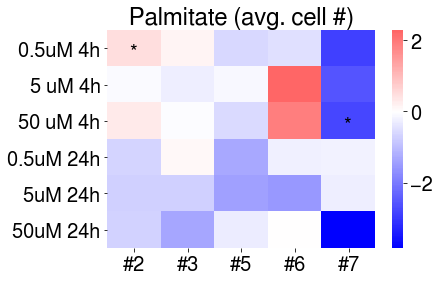

[[0.6195837369261148, 0.4562319487497486, -0.5703321715739104, 0.9621110430250223, -2.6628008416881603], [-0.24893313726709154, -0.03404873555618512, -0.5306058099224046, 2.3283559624363406, -3.2869397183335574], [0.4488242294871308, 0.3690080711883722, -0.7274134015393399, 0.9098193140102384, -1.7127178353883123], [-0.3846827962653957, -0.3907762323128378, -1.1603848600518019, -0.6768806085447383, 0.9269780752341918], [-0.20879711496536354, -1.0685264032606294, -1.4072394443094247, -1.0085150993354839, 0.7414554536138819], [-0.10223962672595273, -1.4380761814976903, -0.15641428129795387, 0, -1.719828033614475]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


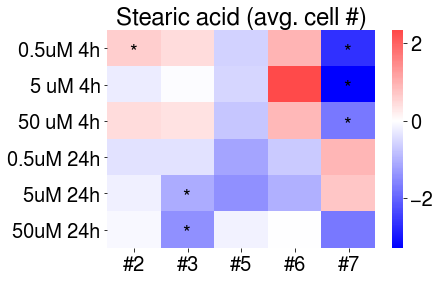

[[0.6672443647303504, -0.4089171404788438, 1.33240875941568, -0.5289915021676111, -0.8310682053643478], [0.20972538655850295, -1.1950488042575882, 0.22674723487501944, -0.034923574840713276, -0.11074728574184942], [-1.7899127134001598, -0.41565252698551497, -2.3114833597478945, -0.3243408349413801, -0.24168881541182077], [-0.6164533986490807, -6.021310997175585, -0.6794144169716175, 0.7702372751068493, -0.12164956607292766], [-0.4266704575640185, -6.6754113197259475, 1.0166371040174227, 0.6076229780912416, -0.6022001163463018], [-1.7465097810958403, -7.194621306834607, -2.2162660276510073, 0, -0.5029225846050347]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


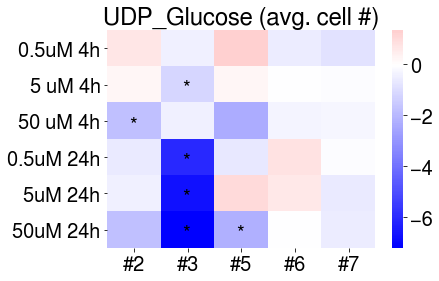

[[-0.13380850549737464, -1.179056737425058, 9.84330511785646, 0.1507886479971378, -1.026383601198507], [-0.14153121539627483, -2.12022110656407, 3.8610792891044627, -0.19261104274158783, 0.28706185583451543], [-3.3045845893208448, -1.8227924107424414, -0.43486354052310966, -0.39326868453620406, -0.3131719977634973], [-0.1874173923773571, -7.747572945825717, -0.25979865001973884, 1.546858149188753, 0.03755719030981434], [-0.5752022640916199, -6.294728281572964, 0.6265228735781159, 1.268831215344608, -0.22990351054560387], [1.6371220002905142, -9.084047819246177, -1.5246283480932223, 0, -0.4999346796479089]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


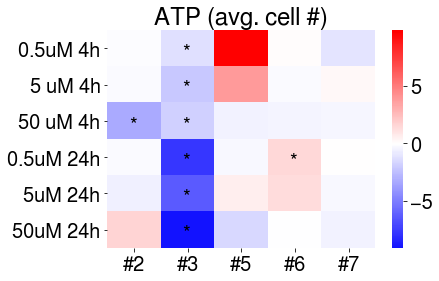

[[-0.057892073528901154, 1.9982687395863448, 2.635359460214145, -1.102212348566633, -3.354328229819951], [0.10051013182657398, 1.0382658176322561, 1.9439816095684617, -0.23784803878734614, -0.4003978981701064], [-2.6730036555764074, 0.5488812662112191, -0.15456020662674025, -0.3458080530739405, -0.19196769510276743], [-0.7991300611998758, -6.509026115572281, -2.135681160871356, 0.9945875667881903, 0.8107860501848382], [-0.9944973004638464, -7.818142443439013, 1.0834367026126785, 1.4045463802934168, 1.1027760727079352], [-1.9474821489571148, -8.285519758166084, -3.0553790016319957, 0, 0.6542459928712425]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


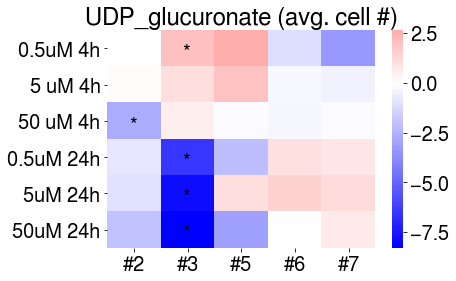

[[-0.47555389136918697, 0.7737081794871151, -0.7564459092162776, -0.6508435368612911, -0.7382565148462316], [-0.26746645288845045, 0.3920829105484234, -0.4834632532540386, 0.5569069417545554, 0.15383447871010253], [-1.1117248395931587, 0.08380027668429973, -1.1096538824423394, 0.45480898754572374, 0.11054705067956182], [-0.38832849167392186, -3.4935331001501697, -0.18437612099070977, 1.1985615972895767, -0.365972954390182], [-0.33663851602487344, -3.3180827653504736, -0.1428195489194372, -0.6784575491426607, 0.9636028088997014], [0.7955405219655043, -3.1103711541777916, -1.0316133031441561, 0, 0.14215099732738848]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


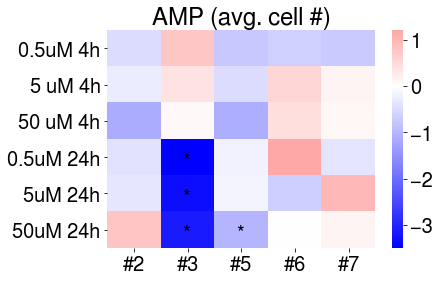

[[0.09922603928751517, -0.24008213562088826, -0.3812252342342202, -0.05480210984575381, -0.05371492133241629], [-0.231456975224749, 0.8270089247382221, -0.14936517428599613, 0.7566475552227436, 0.709866619844982], [-3.6832307539513827, -0.5530582548648705, 0.22954450064838655, -0.14382004565450662, 0.5866714998750655], [-0.23531098965410255, -5.89804707644338, -0.01513969246843686, 0.7571081134177338, 0.32206498419140095], [0.6066783323339675, -3.706905589091376, -1.214994343637627, 0.26244727298254955, 0.6989024115614058], [0.587631565063864, -4.81315817885687, -0.13886240772967548, 0, 0.34713193536992826]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


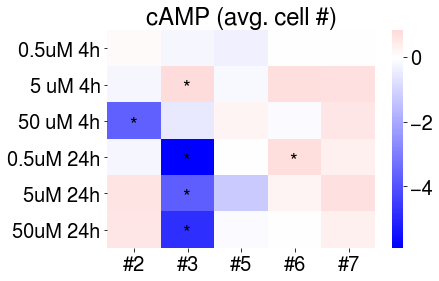

[[-1.4756351892496316, -1.0719164417083153, -0.08693883125407283, 0.3886230071617115, 0.6152195208978286], [-1.315996136131238, -1.4717892115781945, 0.039553015292227725, 0.8273467618808706, -0.2134628163067236], [-2.9189528175021637, -1.397740818243477, -0.15971018406667475, 0.8991446756931963, 0.1085011320985767], [0.722470230876762, -6.16763449745658, -0.16048489133413213, 0.46125877388316455, 0.5268622080094668], [0.697669087813991, -6.362331773527229, -1.1665831799484596, 0.18628058138282366, 0.4926748794864404], [1.1974033054611912, -5.84762169663198, -1.591635675112718, 0, 0.04646167326110803]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


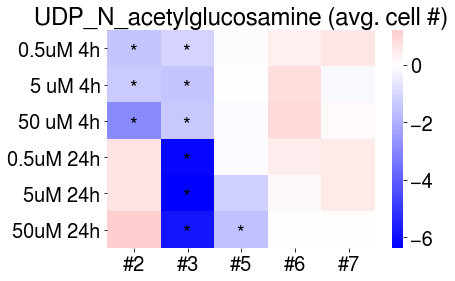

[[-0.5522272205113549, -0.2569357883245603, -0.01681361687372177, 0.022462713423717386, -0.24090941892218243], [-1.031580268978271, -0.10856107250026464, -0.582711972241349, 0.2878074485859063, 0.06837575997629222], [-2.266064852518803, -0.2026710999246584, -0.04776885521584609, -0.29195641534077327, 0.1151478071282449], [1.0064255019416923, -4.7795607016388875, 0.20470215806200792, 0.03989990448694857, -0.20068876079151762], [1.3064302158430048, -4.485028326975207, -0.8225246075560199, -0.25555714523119627, -0.2979345746037256], [0.7150882973934536, -5.087520635057727, -0.7217925963447428, 0, -0.285223740723726]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


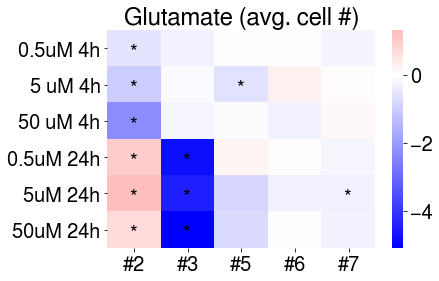

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


13.213879412052158 0.0 0.33034698530130396 -5.357552004618084
13.213879412052158 0.0 0.33034698530130396 -5.357552004618084
0.0 5.973220933919713 0.14933052334799282 5.357552004618084
0.0 3.0688873323658528 0.07672218330914632 5.357552004618084
0.0 nan nan nan
[[-0.5527117383142625, -1.287229149878847, 0.6941577794244489, -1.5271362421645727, -0.004533577581816569], [-1.0775969770486462, -2.1446822292529335, 1.1479476528947992, -5.357552004618084, -0.6684707360232119], [-3.3418340593550644, -1.7244133261345824, 0.2569856199554782, -5.357552004618084, 0.17591570246315436], [0.9092748346769994, 0.17229108430428872, 0.4869377244763076, 5.357552004618084, 1.5379141339948634], [1.1358165332899768, 1.3051793025811127, -2.512576148928304, 5.357552004618084, 1.4925972495092958], [0.5364974259902417, -0.13140692121672803, -0.5942110930558216, 0, 0.19222305832362493]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice


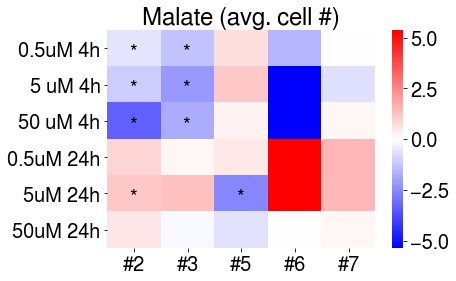

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


4.010726832568491 0.0 0.10026817081421227 -5.357552004618084
[[-0.7733161624517674, -0.6989150557922644, 1.2279591834741286, 0.2975746899591329, -0.0437548650061433], [-0.888842074329251, -0.5170767328064481, 0.2706971041366545, 0.25284971214831237, -0.2972180809858489], [-0.5877000632899883, -0.2944673811574539, 0.6323137366754155, -0.062215396445696146, 0.03696114380360904], [0.23818544429005006, -3.142324776284857, 0.06969755370365757, 1.1364539092686508, -0.23313406214808297], [0.9368502973499464, -2.2071330719129603, 0.017443679753592806, 0.6514995031169472, 0.06814295166660522], [1.4533988348847222, -5.357552004618084, 1.0042298942494672, 0, -0.9478772689238675]] 6


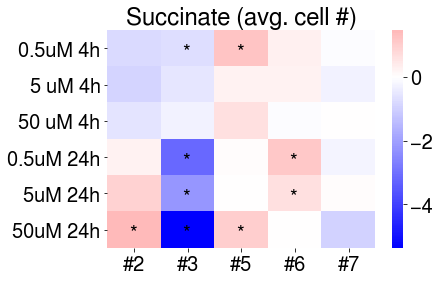

[[-0.76834254023167, -0.1388233158166065, 0.24911718089690815, -0.793762512952923, 0.11237609306574164], [-0.8330450827748134, 0.07103026708740369, 0.014309339738818615, -0.3210381112687472, 0.06716016017859174], [-0.6738278513671142, 0.11534644070583726, -0.1633181404869901, -0.6317205345833518, 0.4009924498469264], [0.4090636372816609, -2.485569470559674, -0.11099086349158106, 0.3076136067955816, 0.30314131048105253], [0.34887642992834006, -2.326381918663009, -0.9511090531430334, -0.0836980308593695, 0.17967527676965706], [0.4726508011068874, -1.480283219898313, -0.21464410087915078, 0, 0.24893660077526497]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


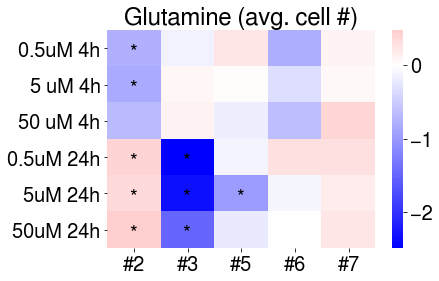

[[-0.7969584039765493, -0.14401304959629735, 0.1062245887568959, -0.19194167705016932, -0.42270188234444955], [-1.0841939679327992, -0.3041415553676642, -0.1439414940907398, 0.2726908699202237, 0.07909450832429907], [-1.4126074034209575, -0.29807484673173595, -0.03180310233030197, 0.18374681762622042, 0.21414683218929834], [-0.023479148803302315, -4.051917989096921, 0.1750738985936011, 0.09151233292508577, -0.005180544722635312], [0.2803099041175191, -4.266427084006273, -0.6334820335720621, -0.2257423196436055, -0.0793247411279208], [0.6717165680006963, -4.246865030856299, -0.4092025453254601, 0, -0.24298278014380267]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


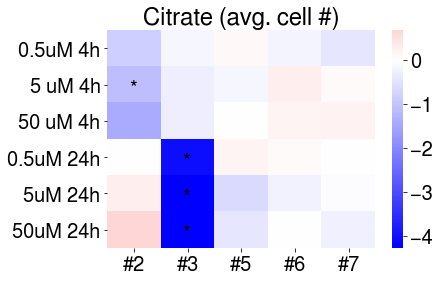

[[-0.7286061272402582, 0.4601774749106078, 0.728638762389132, -0.6620480461098672, -0.234389186517522], [-0.3983778929470931, 0.304569494525656, -0.04536020513103438, 0.3389284281906243, 0.20745015670725547], [-1.166122606873953, 0.9493017111908294, 2.6256718321367885, -0.42032871977609276, -0.3893216207940472], [0.34397273151245894, -4.416451309395553, 0.48091748930200323, 0.3980134993567127, 0.4176678823280257], [0.12863823605213606, -4.3404331338284585, -1.2902156422058928, 0.2451778343839241, 0.682243908027224], [1.2128088784087732, -6.061381722160066, -0.12776308411410073, 0, 0.6642718073972085]] 6


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


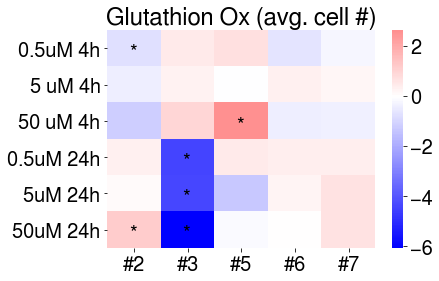

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2


5.318624460932164 0.0 0.1329656115233041 -5.357552004618084
4.26959534188786 0.0 0.1067398835471965 -5.357552004618084


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


4.26959534188786 0.0 0.1067398835471965 -5.357552004618084
[[-1.0043428706430433, -0.5653063483965137, 0.017990678935170583, -0.004897656069877947, -0.3641075704198704], [-2.0445491930380664, -0.427428635789962, -0.42650554428755133, 0.4240678489931253, -0.13685414607706792], [-5.357552004618084, -0.22133239554233236, -0.20365052125715838, 0.001580533763785019, 0.13815074178110534], [1.3380573313092388, -5.357552004618084, 0.2595164195285759, 0.2518242966288332, -0.10422495217756494], [1.8257170779178924, -8.89837023393258, -0.11479124164133808, -0.013969576168598095, -0.15811982084715376], [1.5279325424399963, -5.357552004618084, -0.486432086293321, 0, -0.03363313758566433]] 6


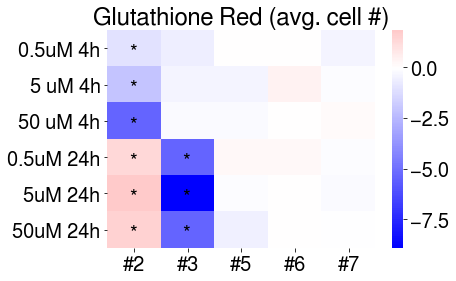

In [8]:
f = open('messages_significances.txt', 'w')

for metabolite in metabolites:
    metabolite_heatmap = []; significance_heatmap = []
    for time in times:
        for treatment in treatments:
            significances = []; trends = []; mhvs = []; shvs = []
            for experiment in experiments:
                
                raw_sample_values = df[(df['Treatment'] == treatment) & (df['Timepoint (h)'] == time) &(df['Experiment'] == experiment)][metabolite].values
                raw_reference_values = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == time) &(df['Experiment'] == experiment)][metabolite].values
                
                cn_sample = df[(df['Timepoint (h)'] == time) & (df['Experiment'] == experiment)]['Cell numbers'].values
                cn_reference = df[(df['Timepoint (h)'] == time) & (df['Experiment'] == experiment)]['Cell numbers'].values
                
                cnf_sample = 1e6/numpy.mean(cn_sample)
                cnf_reference = 1e6/numpy.mean(cn_reference)
                
                sample_cn_norm_values = raw_sample_values * cnf_sample
                reference_cn_norm_values = raw_reference_values * cnf_reference
                                
                fc = numpy.nanmean(sample_cn_norm_values) / numpy.nanmean(reference_cn_norm_values)
                log2fc = numpy.log2(fc)
                
                if (numpy.nanmean(reference_cn_norm_values) == 0) or (numpy.nanmean(sample_cn_norm_values) == 0):
                    a = numpy.nanmean(reference_cn_norm_values)
                    b = numpy.nanmean(sample_cn_norm_values)
                    epsilon = 0.05 * numpy.mean([a, b])
                    fc = (b + epsilon) / (a + epsilon)
                    log2fc = numpy.log2(fc)
                    print(a, b, epsilon, log2fc)
                
                if (len(sample_cn_norm_values) > 1) & (len(reference_cn_norm_values) > 1):
                    stat, pvalue = scipy.stats.mannwhitneyu(sample_cn_norm_values, reference_cn_norm_values)
                else:
                    stat = 'bypassed'; log2fc = 0; pvalue = 1
                mhvs.append(log2fc)
                
                if pvalue < 0.05:
                    shvs.append(True)
                    significances.append(True)
                    matplotlib.pyplot.plot([1, 2], [reference_cn_norm_values, sample_cn_norm_values], 'ok', alpha=0.5)
                    matplotlib.pyplot.xticks([1, 2], ['reference', 'sample'])
                    
                    filename = 'figures/{}_treatment_{}_time_{}.pdf'.format(metabolite, treatment, time)
                    matplotlib.pyplot.savefig(filename)
                    matplotlib.pyplot.clf()
                    if numpy.mean(sample_cn_norm_values) > numpy.mean(reference_cn_norm_values):
                        trends.append('up')
                    else:
                        trends.append('down')
                else:
                    significances.append(False)
                    trends.append('null')
                    shvs.append(False)
                
                ###
                ### message
                ###
                f.write('{} | treatment {} | time {} | experiment {} | \n'.format(metabolite, treatment, time, experiment))
                f.write('\t raw_sample_values \t {} \n'.format(raw_sample_values))
                f.write('\t raw_reference_values \t {} \n'.format(raw_reference_values))
                f.write('\t cn_sample \t {} \n'.format(cn_sample))
                f.write('\t cn_reference \t {} \n'.format(cn_reference))
                f.write('\t cnf_sample \t {} \n'.format(cnf_sample))
                f.write('\t cnf_reference \t {} \n'.format(cnf_reference))
                f.write('\t sample_cn_norm_values \t {} \n'.format(sample_cn_norm_values))
                f.write('\t reference_cn_norm_values \t {} \n'.format(reference_cn_norm_values))
                f.write('\t log2fc \t {} \n'.format(log2fc))
                f.write('\t U-MW \t {} {} \n'.format(stat, pvalue))
            ###
            ### majority vote
            ###
            if (trends.count('up') >= 3) | (trends.count('down') >= 3):
                decision = True
                f.write('{} treatment {} time {} | Decision | {} | Because of {} \n'.format(metabolite, treatment, time, decision, trends))
                f.write('\n')
            else:
                decision = False
                f.write('{} treatment {} time {} | Decision | {} | Because of {} \n'.format(metabolite, treatment, time, decision, trends))
            f.write('\n')
            
            ###
            metabolite_heatmap.append(mhvs)
            significance_heatmap.append(shvs)
            
    ###
    print(metabolite_heatmap, len(metabolite_heatmap))
    the_yticks = ['0.5uM 4h', '5 uM 4h', '50 uM 4h', '0.5uM 24h', '5uM 24h', '50uM 24h']
    the_xticks = ['#{}'.format(element) for element in experiments]
    seaborn.heatmap(metabolite_heatmap, cmap='bwr', xticklabels=the_xticks, center=0, yticklabels=the_yticks)
    
    for i in range(len(experiments)):
        for j in range(len(the_yticks)):
            if significance_heatmap[j][i] == True:
                matplotlib.pyplot.text(i+0.4, j+0.75, '*')
    
    matplotlib.pyplot.title('{} (avg. cell #)'.format(metabolite))
    matplotlib.pyplot.show()
            
f.close()